# Content Strategy para creadores de contenido premium: una aproximación desde la simulación

Cómo catapultar tu negocio como Content Creator


In [7]:
import pandas as pd

df = pd.read_json('./data/orders-dataset.json')

In [8]:
df.describe()

,IA
count,4808.000000
mean,31.291181
std,43.201783
min,0.000000
25%,5.000000
50%,15.000000
75%,40.000000
max,347.000000


## Calculo de FDP para el Intervalo entre Compras


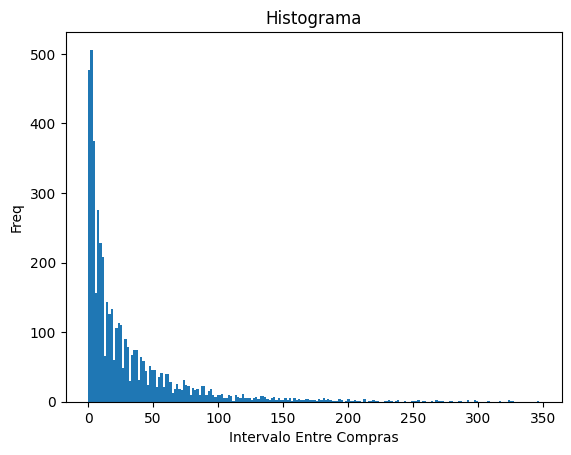

In [9]:
from matplotlib import pyplot as plt

# Histograma de HORAS
plt.title("Histograma")
plt.xlabel("Intervalo Entre Compras")
plt.ylabel("Freq")
plt.hist(df.IA, bins=200)
plt.show()

In [10]:
from fitter import Fitter

f = Fitter(df.IA)
f.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
weibull_min,0.000071,1613.073908,1632.508018,inf,0.071690,6.212552e-22
powerlognorm,0.000078,1547.962095,1573.874241,inf,0.043597,2.227872e-08
halfgennorm,0.000080,1546.133543,1565.567653,inf,0.042637,4.942374e-08
johnsonsb,0.000097,1535.306476,1561.218622,inf,0.035422,1.121220e-05
fatiguelife,0.000102,1565.514907,1584.949017,inf,0.035282,1.233428e-05


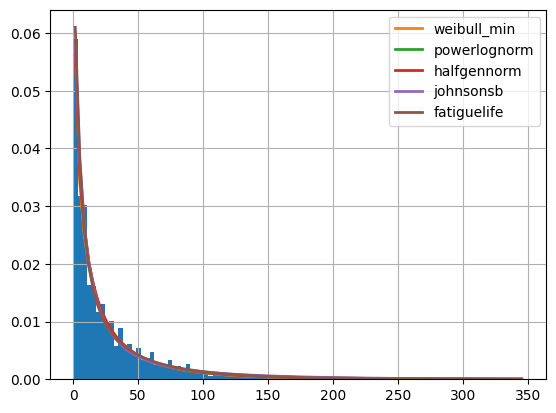

In [11]:
f.summary()

In [12]:
f.get_best(method='sumsquare_error')

{'weibull_min': {'c': 0.6992732706985292,
  'loc': -1.5616001872649825e-27,
  'scale': 21.92617425196091}}

### Verificacion

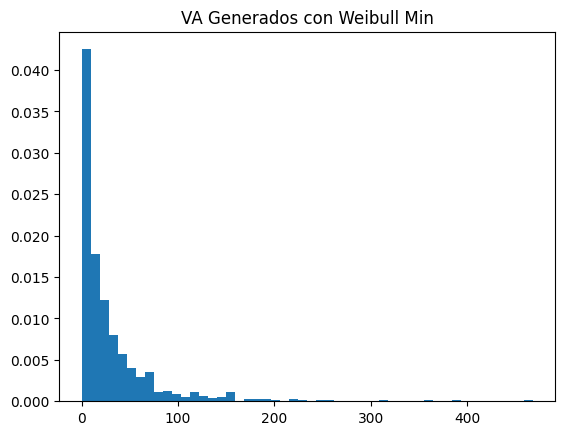

In [13]:
from scipy import stats

best_weibull_min_params = f.get_best(method='sumsquare_error').get("weibull_min")
gen_ia = stats.weibull_min.rvs(**best_weibull_min_params, size=1000, random_state=None)
import matplotlib.pyplot as plt

plt.hist(gen_ia, bins=50, density=True)
plt.title("VA Generados con Weibull Min")
plt.show()

QED

```python
ic = {'weibull_min': {'c': 0.6992732706985292,
                      'loc': -1.5616001872649825e-27,
                      'scale': 21.92617425196091
                     }
     }
```

## Calculo FDP Propina


In [14]:
tips = pd.read_json('./data/tips-dataset.json')

FileNotFoundError: File ./data/tips-dataset.json does not exist

In [12]:
tips.describe()

,price
count,1681.000000
mean,26.615110
std,22.693454
min,5.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,100.000000


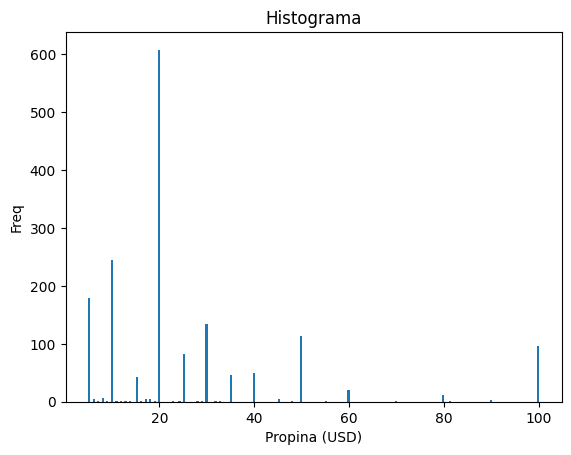

In [13]:
# Histograma de propinas
plt.title("Histograma")
plt.xlabel("Propina (USD)")
plt.ylabel("Freq")
plt.hist(tips.price, bins=200)
plt.show()

In [14]:
f2 = Fitter(tips.price)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dgamma,0.111207,1367.161173,1383.442606,inf,0.210798,5.141835e-66
gennorm,0.141017,1277.821564,1294.102996,inf,0.204938,2.189947e-62
dweibull,0.162327,1095.615156,1111.896589,inf,0.221657,5.058519e-73
loglaplace,0.172029,1123.066633,1139.348065,inf,0.204938,2.189934e-62
cauchy,0.173858,1197.522222,1208.376511,inf,0.224474,6.701989e-75
foldcauchy,0.173990,1120.964260,1137.245693,inf,0.193403,1.492335e-55
laplace,0.174669,1185.347100,1196.201388,inf,0.204938,2.189947e-62
skewcauchy,0.174931,1165.444052,1181.725484,inf,0.188330,1.120938e-52
laplace_asymmetric,0.175910,1103.357601,1119.639034,inf,0.290314,5.706554e-126
chi,0.176430,1133.095192,1149.376624,inf,0.191221,2.633329e-54


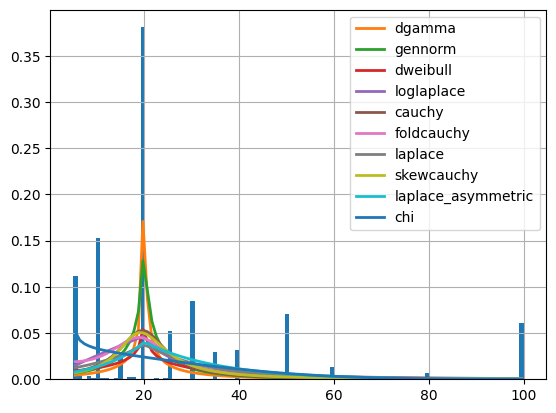

In [15]:
f2.fit()
f2.summary(10)

In [17]:
f2.get_best(method='sumsquare_error')

{'dgamma': {'a': 0.26918309159509146,
  'loc': 19.999999999999993,
  'scale': 19.08326487029376}}

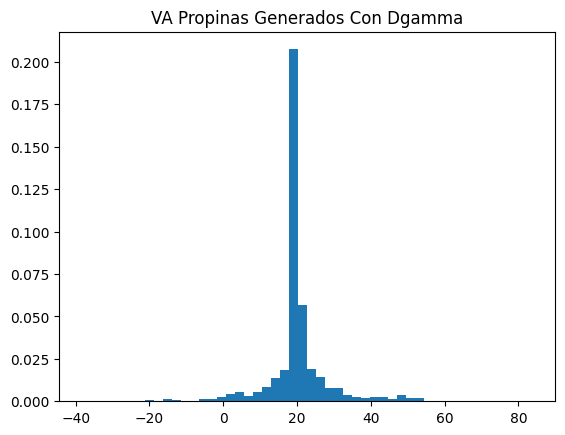

In [18]:
# Parámetros de la distribución
best_tips_params = f2.get_best(method='sumsquare_error').get('dgamma')

random_values = stats.dgamma.rvs(**best_tips_params, size=1000, random_state=None)

# Graficamos los valores aleatorios
import matplotlib.pyplot as plt

plt.hist(random_values, bins=50, density=True)
plt.title("VA Propinas Generados Con Dgamma")
plt.show()

QED

```python
# Monto Propina
mp = {'dgamma': {'a': 0.26918309159509146,
                'loc': 19.999999999999993,
                'scale': 19.08326487029376
                 }
    }
```

## Calculo PDF Precios Aceptables Subscripcion 

In [15]:
items = pd.json_normalize(df.item)
items.describe()

,price
count,4808.000000
mean,24.827579
std,15.289183
min,-100.000000
25%,10.000000
50%,25.000000
75%,35.000000
max,100.000000


In [16]:
items.type.value_counts()

type
performer_subscription    3370
exclusive                 1204
tip_performer              226
refund                       8
Name: count, dtype: int64

In [17]:
subscriptions = items.groupby('type')['price'].mean()

In [18]:
subscriptions

type
exclusive                 16.540698
performer_subscription    27.995846
refund                   -58.125000
tip_performer             24.668142
Name: price, dtype: float64

In [26]:
filtered = items[items['type'] == 'performer_subscription']

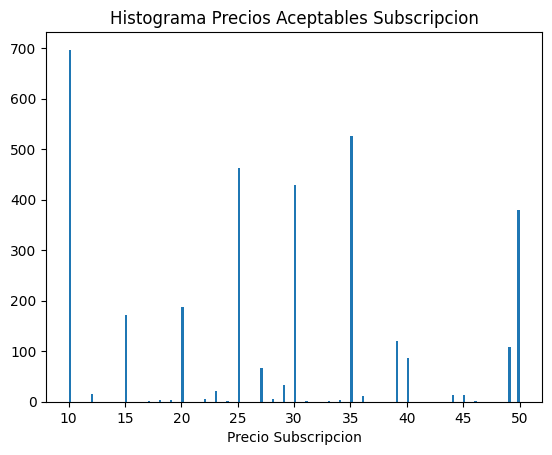

In [20]:
plt.title('Histograma Precios Aceptables Subscripcion')
plt.xlabel('Precio Subscripcion')
plt.hist(filtered['price'], bins=200)
plt.show()

In [28]:
filtered['price'].describe()

count    3370.000000
mean       27.995846
std        13.019541
min        10.000000
25%        15.000000
50%        30.000000
75%        35.000000
max        50.000000
Name: price, dtype: float64

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
dgamma,1.680529,750.258429,767.303110,inf,0.190707,1.588169e-69
dweibull,1.682894,741.068510,758.113191,inf,0.181550,5.298255e-63
gompertz,1.684670,723.306570,740.351252,inf,0.147324,1.554459e-41
triang,1.685357,720.910693,737.955374,inf,0.143464,2.119973e-39
foldnorm,1.686184,721.442568,738.487249,inf,0.157710,1.445636e-47
johnsonsb,1.686389,729.767146,752.493387,inf,0.139043,5.013294e-37
burr,1.686622,751.229578,773.955819,inf,0.153720,3.362679e-45
gumbel_l,1.686799,755.869721,767.232841,inf,0.146194,6.641685e-41
genhyperbolic,1.686810,745.477471,773.885273,inf,0.154316,1.502943e-45
pearson3,1.686820,741.409084,758.453765,inf,0.154406,1.330915e-45


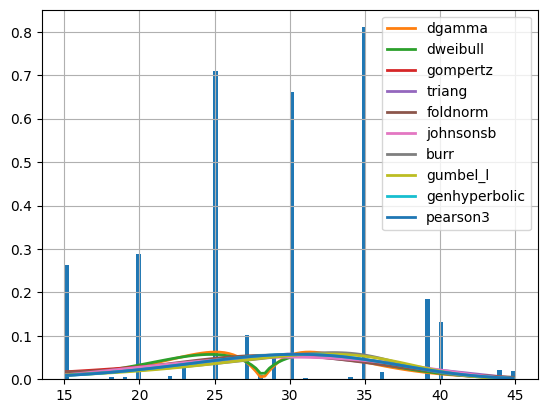

In [55]:
f3 = Fitter(filtered['price'][filtered['price'].between(13, 45)])
f3.fit()
f3.summary(10)

In [30]:
f3.get_best()


{'dgamma': {'a': 2.1073297452845834,
  'loc': 28.178771593939764,
  'scale': 2.8079889625195245}}

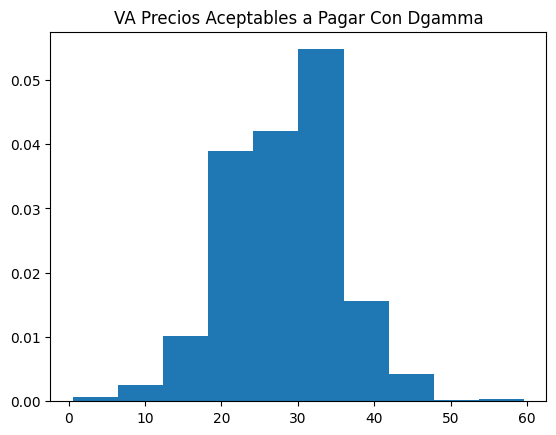

In [56]:
# Parámetros de la distribución
best_prices_params = f3.get_best(method='sumsquare_error').get('dgamma')

random_values = stats.dgamma.rvs(**best_prices_params, size=1000, random_state=None)

# Graficamos los valores aleatorios
import matplotlib.pyplot as plt

plt.hist(random_values, density=True)
plt.title("VA Precios Aceptables a Pagar Con Dgamma")
plt.show()

In [57]:
df_prices = pd.DataFrame()
df_prices['price'] = random_values
df_prices.describe()

,price
count,1000.000000
mean,28.061840
std,7.290651
min,0.589387
25%,23.249845
50%,28.834440
75%,33.072824
max,59.578033
